In [26]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [27]:
dataset = MNIST(root='data/', download=True)

In [28]:
len(dataset)

60000

In [29]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [30]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 5


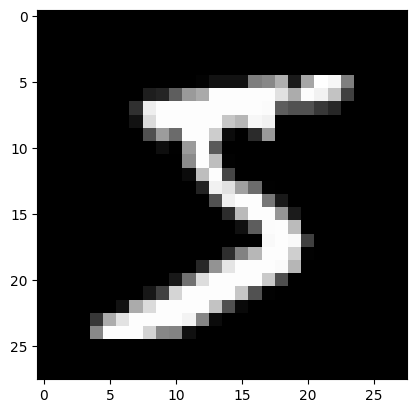

In [32]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:', label)    

Label: 3


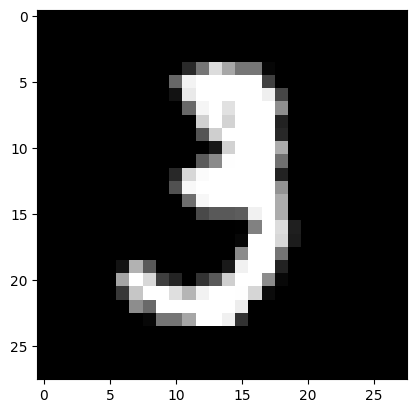

In [33]:
image, label = dataset[10]
plt.imshow(image, cmap='gray')
print('Label:', label)

In [34]:
import torchvision.transforms as transforms

In [35]:
# MNIST dataset (image and lables)
dataset = MNIST(root='data/',
                train=True,
                transform=transforms.ToTensor())

In [36]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [37]:
print(img_tensor[0,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(1.) tensor(0.)


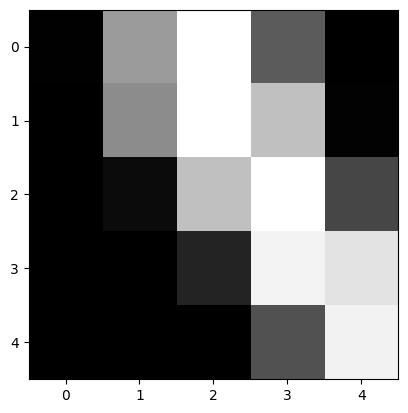

In [38]:
# plot the image by passing inthe 28x28 matrix
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray')

In [39]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [40]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [41]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

#Logistic Regression model
model = nn.Linear(input_size, num_classes)

In [42]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[-0.0183,  0.0330,  0.0316,  ..., -0.0284,  0.0116,  0.0340],
        [ 0.0122, -0.0198, -0.0293,  ...,  0.0083,  0.0069, -0.0229],
        [ 0.0222,  0.0045,  0.0176,  ...,  0.0057, -0.0270, -0.0138],
        ...,
        [ 0.0169,  0.0186, -0.0018,  ..., -0.0010, -0.0195, -0.0177],
        [ 0.0032,  0.0113, -0.0176,  ..., -0.0017,  0.0066,  0.0236],
        [ 0.0012,  0.0051, -0.0230,  ...,  0.0017, -0.0233, -0.0073]],
       requires_grad=True)

In [43]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([ 0.0094, -0.0191,  0.0305,  0.0329,  0.0330, -0.0071,  0.0269,  0.0215,
         0.0169,  0.0172], requires_grad=True)

In [44]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    images = images.view(images.size(0), -1)  # Flatten to [batch_size, 784]
    outputs = model(images)
    print(outputs)
    break

tensor([2, 3, 7, 6, 1, 9, 8, 1, 8, 3, 8, 9, 6, 0, 7, 1, 8, 2, 3, 0, 1, 3, 2, 6,
        4, 6, 2, 0, 1, 9, 7, 1, 9, 3, 2, 0, 0, 7, 4, 3, 1, 6, 1, 1, 5, 5, 4, 7,
        2, 5, 1, 8, 7, 1, 7, 7, 4, 2, 3, 4, 4, 3, 3, 1, 4, 9, 2, 7, 2, 8, 8, 2,
        2, 3, 9, 5, 8, 5, 6, 4, 1, 5, 5, 7, 5, 9, 0, 3, 9, 3, 6, 8, 1, 5, 4, 5,
        4, 1, 7, 2, 0, 4, 3, 4, 4, 0, 2, 5, 2, 0, 9, 4, 6, 3, 2, 1, 3, 5, 2, 0,
        2, 7, 0, 6, 6, 4, 1, 1])
torch.Size([128, 1, 28, 28])
tensor([[ 0.1366,  0.1409, -0.0066,  ..., -0.1002, -0.0707, -0.0805],
        [ 0.0147,  0.2133,  0.0751,  ...,  0.0313,  0.0728, -0.1020],
        [ 0.3270,  0.2021, -0.0848,  ...,  0.0139,  0.1463,  0.1312],
        ...,
        [-0.0615,  0.0826, -0.0776,  ..., -0.2004, -0.1815,  0.0281],
        [ 0.1637,  0.1161,  0.0802,  ...,  0.0653, -0.0841,  0.0435],
        [ 0.2440,  0.1169, -0.0542,  ...,  0.1920, -0.0840, -0.0539]],
       grad_fn=<AddmmBackward0>)


In [45]:
images.shape

torch.Size([128, 784])

In [46]:
images.reshape(128, 784).shape

torch.Size([128, 784])

In [47]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = MnistModel()

In [48]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [49]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0118, -0.0085, -0.0198,  ..., -0.0115,  0.0216,  0.0179],
         [-0.0149,  0.0137,  0.0008,  ...,  0.0105,  0.0285,  0.0074],
         [ 0.0145,  0.0002, -0.0155,  ...,  0.0006,  0.0281, -0.0048],
         ...,
         [ 0.0068,  0.0067,  0.0241,  ..., -0.0070,  0.0280, -0.0242],
         [ 0.0303, -0.0117, -0.0023,  ..., -0.0215,  0.0018,  0.0184],
         [-0.0318, -0.0223,  0.0307,  ...,  0.0060, -0.0223, -0.0046]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0033, -0.0158,  0.0115,  0.0176, -0.0025, -0.0018,  0.0171, -0.0104,
          0.0062, -0.0275], requires_grad=True)]

In [50]:
for images, labels in train_loader:
    outputs = model(images)
    break
print(images.shape)
print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

torch.Size([128, 1, 28, 28])
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[ 6.1015e-02,  5.7396e-01,  8.4995e-03, -2.2832e-01, -2.4749e-01,
          2.6888e-01,  1.7931e-01,  3.7348e-01, -1.0727e-02, -1.3553e-01],
        [ 2.0751e-01,  1.8429e-01,  1.8466e-01,  8.6723e-02,  6.6109e-02,
          1.1101e-02,  9.9129e-03, -3.9607e-02, -1.7244e-04, -4.7461e-02]])


In [51]:
import torch.nn.functional as F

In [52]:
outputs[:2]

tensor([[ 6.1015e-02,  5.7396e-01,  8.4995e-03, -2.2832e-01, -2.4749e-01,
          2.6888e-01,  1.7931e-01,  3.7348e-01, -1.0727e-02, -1.3553e-01],
        [ 2.0751e-01,  1.8429e-01,  1.8466e-01,  8.6723e-02,  6.6109e-02,
          1.1101e-02,  9.9129e-03, -3.9607e-02, -1.7244e-04, -4.7461e-02]],
       grad_fn=<SliceBackward0>)

In [53]:
# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

#look at sample probabilities
print("Sample Probabilities:\n", probs[:2].data)

#add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())

Sample Probabilities:
 tensor([[0.0945, 0.1579, 0.0897, 0.0708, 0.0694, 0.1164, 0.1064, 0.1292, 0.0880,
         0.0777],
        [0.1147, 0.1121, 0.1121, 0.1016, 0.0996, 0.0942, 0.0941, 0.0896, 0.0932,
         0.0889]])
Sum:  1.0


In [54]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([1, 0, 7, 7, 5, 5, 1, 1, 1, 1, 5, 6, 7, 6, 7, 1, 7, 0, 6, 0, 5, 7, 7, 1,
        7, 6, 7, 6, 1, 1, 1, 7, 7, 1, 6, 1, 1, 1, 1, 5, 7, 7, 7, 6, 7, 6, 7, 6,
        6, 6, 1, 1, 5, 0, 7, 5, 7, 2, 1, 1, 1, 7, 5, 1, 6, 7, 1, 1, 7, 5, 7, 1,
        1, 7, 1, 1, 7, 0, 7, 7, 6, 7, 2, 5, 1, 7, 1, 1, 1, 7, 1, 1, 1, 1, 1, 6,
        0, 1, 6, 1, 5, 0, 1, 1, 1, 8, 1, 6, 7, 2, 7, 1, 6, 5, 1, 1, 1, 6, 7, 1,
        7, 1, 7, 5, 1, 1, 0, 0])
tensor([0.1579, 0.1147, 0.1275, 0.1383, 0.1341, 0.1248, 0.1220, 0.1494, 0.1134,
        0.1278, 0.1218, 0.1401, 0.1484, 0.1185, 0.1328, 0.1384, 0.1274, 0.1271,
        0.1487, 0.1271, 0.1330, 0.1235, 0.1257, 0.1430, 0.1296, 0.1436, 0.1228,
        0.1473, 0.1385, 0.1354, 0.1290, 0.1400, 0.1232, 0.1385, 0.1479, 0.1308,
        0.1412, 0.1543, 0.1397, 0.1284, 0.1270, 0.1262, 0.1318, 0.1430, 0.1230,
        0.1578, 0.1257, 0.1655, 0.1761, 0.1353, 0.1167, 0.1298, 0.1177, 0.1429,
        0.1232, 0.1229, 0.1265, 0.1220, 0.1434, 0.1394, 0.1336, 0.1557, 0.1164,
       

In [55]:
labels

tensor([9, 2, 9, 9, 7, 2, 7, 7, 9, 7, 6, 0, 9, 5, 1, 4, 2, 1, 5, 1, 7, 3, 2, 1,
        2, 0, 2, 0, 3, 7, 7, 3, 6, 7, 5, 9, 4, 4, 2, 9, 8, 5, 2, 5, 9, 8, 2, 0,
        0, 0, 1, 5, 8, 5, 8, 4, 4, 2, 3, 8, 8, 6, 3, 1, 0, 1, 3, 5, 8, 7, 6, 4,
        7, 0, 3, 7, 5, 1, 5, 2, 6, 2, 3, 3, 7, 6, 1, 0, 5, 2, 5, 2, 3, 5, 2, 5,
        1, 8, 1, 8, 9, 7, 3, 3, 2, 9, 1, 3, 1, 2, 2, 7, 2, 7, 1, 3, 3, 0, 6, 8,
        4, 4, 5, 5, 3, 8, 4, 8])

In [56]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [57]:
accuracy(outputs, labels)

tensor(0.0781)

In [58]:
loss_fn = F.cross_entropy

In [59]:
#loss for current batch of data
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.2991, grad_fn=<NllLossBackward0>)


In [ ]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    #training the model using gradient descent
    optimizer = opt_func(model.parameters(), lr)
    history = []# for recording epoch-wise results
    for epoch in range(epochs):

        # training Phase
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        # Validation Phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [ ]:
def evaluate(model, val_loader):
    #Evaluates the model's performance on the validation set
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [62]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch
        out = self(images)  #generating predictions
        loss = F.cross_entropy(out, labels)  # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch
        out = self(images)  #generate predictions
        loss = F.cross_entropy(out, labels)  #calculate loss
        acc = accuracy(out, labels)    #calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
    
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()  #Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()   # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

model = MnistModel()

In [63]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.3138041496276855, 'val_acc': 0.1373615562915802}

In [64]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9460, val_acc: 0.6128
Epoch [1], val_loss: 1.6795, val_acc: 0.7196
Epoch [2], val_loss: 1.4808, val_acc: 0.7547
Epoch [3], val_loss: 1.3307, val_acc: 0.7759
Epoch [4], val_loss: 1.2151, val_acc: 0.7876


In [65]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1241, val_acc: 0.7993
Epoch [1], val_loss: 1.0509, val_acc: 0.8068
Epoch [2], val_loss: 0.9909, val_acc: 0.8119
Epoch [3], val_loss: 0.9410, val_acc: 0.8182
Epoch [4], val_loss: 0.8987, val_acc: 0.8232


In [66]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8623, val_acc: 0.8263
Epoch [1], val_loss: 0.8308, val_acc: 0.8303
Epoch [2], val_loss: 0.8032, val_acc: 0.8320
Epoch [3], val_loss: 0.7788, val_acc: 0.8350
Epoch [4], val_loss: 0.7571, val_acc: 0.8376


In [67]:
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7374, val_acc: 0.8402
Epoch [1], val_loss: 0.7198, val_acc: 0.8417
Epoch [2], val_loss: 0.7037, val_acc: 0.8437
Epoch [3], val_loss: 0.6890, val_acc: 0.8451
Epoch [4], val_loss: 0.6756, val_acc: 0.8465


Text(0.5, 1.0, 'Accuracy vs. No. of epochs')

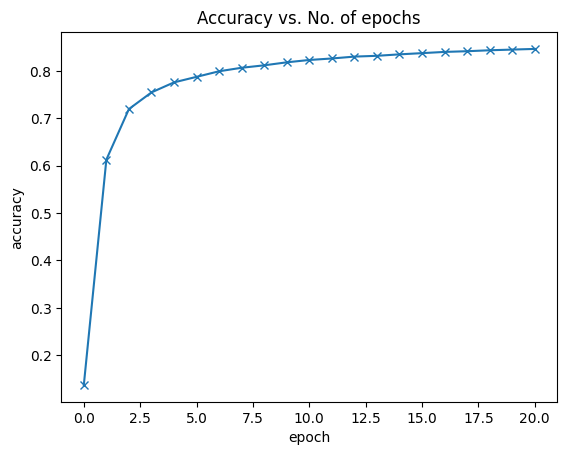

In [68]:
history = [result0] + history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs')

In [69]:
#define test dataset
test_dataset = MNIST(root='data/',
                     train=False,
                     transform=transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 7


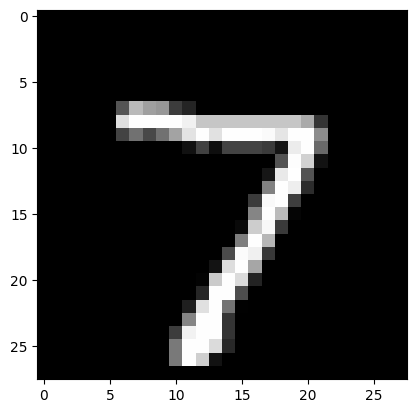

In [70]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

In [71]:
img.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [72]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

Label: 7 , Predicted: 7


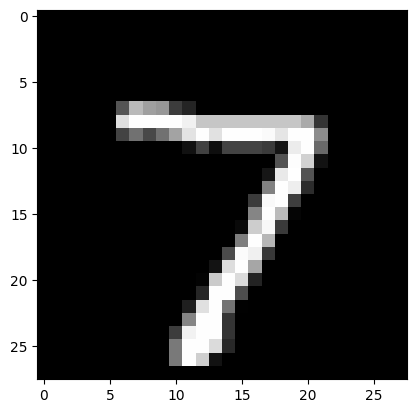

In [73]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 0 , Predicted: 0


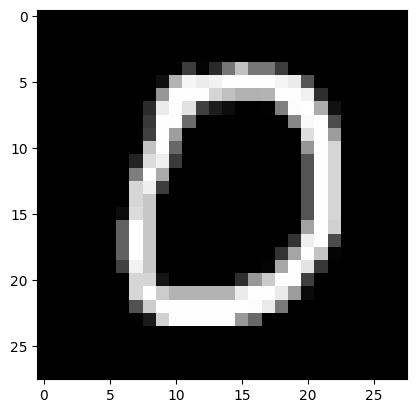

In [74]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 9 , Predicted: 9


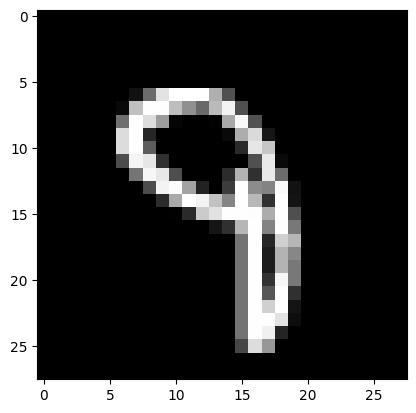

In [75]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 2 , Predicted: 8


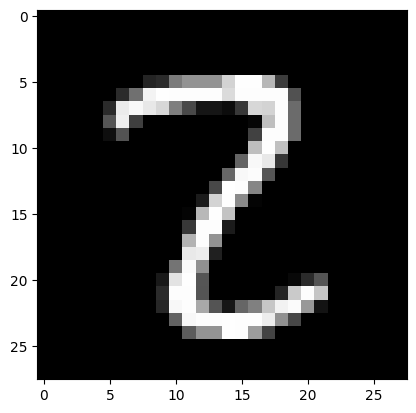

In [76]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [77]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_loss': 0.6426001787185669, 'val_acc': 0.8584960699081421}

In [78]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

In [79]:
model2 = MnistModel()
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0252,  0.0211,  0.0352,  ..., -0.0047, -0.0227,  0.0260],
                      [-0.0023,  0.0124,  0.0334,  ..., -0.0277, -0.0086, -0.0292],
                      [-0.0299, -0.0142, -0.0101,  ...,  0.0176,  0.0268,  0.0203],
                      ...,
                      [-0.0319,  0.0113, -0.0060,  ...,  0.0281, -0.0032,  0.0351],
                      [ 0.0070,  0.0123,  0.0102,  ...,  0.0283,  0.0352,  0.0055],
                      [-0.0299,  0.0285,  0.0316,  ..., -0.0175,  0.0082,  0.0139]])),
             ('linear.bias',
              tensor([-0.0621,  0.0787, -0.0288, -0.0132,  0.0359,  0.0560,  0.0024,  0.0164,
                      -0.0953, -0.0293]))])

In [80]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model2, test_loader)
result

{'val_loss': 0.6426001787185669, 'val_acc': 0.8584960699081421}